# Creating, Reading and Writing

In this micro-course, you'll learn about **Pandas**, the most popular Python library for data analysis.

Along the way, you'll complete several hands-on exercises with real-world data.

### Getting started

To use pandas, you'll typically start with the following line of code.

In [3]:
import pandas as pd

### Creating data

There are two core objects in pandas: The __DataFrame__ and the **Series**


#### Dataframe

A DataFrame is a table. It contains an array of infividual entries, each of which has a certain value. Each entry corresponds to a row (or record) and a column.

For example, consider the following simple Dataframe below:

In [3]:
pd.DataFrame({'Yes': [50, 21], 'No': [131, 2]})

,Yes,No
0,50,131
1,21,2


In this example, the "0, No" entry has the value of 131. The "0, Yes" entry has a value of 50, and so on.

DataFrame entries are not limited to integers. For instance, here's a DataFrame whose values are strings:

In [4]:
pd.DataFrame({'Bob': ['I liked it.', 'It was awful.'], 'Sue': ['Pretty good.', 'Bland.']})

,Bob,Sue
0,I liked it.,Pretty good.
1,It was awful.,Bland.


We are using the pd.DataFrame() constructor to generate these DataFrame objects. The syntax for declaring a new one is a dictionary whose keys are the column names (Bob and Sue in this example), and whose values are a list of entries. This is the standard way of constructing a new DataFrame, and the one you are most likely to encounter.

The dictionary-list constructor assigns values to the column labels, but just uses an ascending count from 0 (0, 1, 2, 3, ...) for the row labels. Sometimes this is OK, but oftentimes we will want to assign these labels ourselves.

The list of row labels used in a DataFrame is known as an Index. We can assign values to it by using an index parameter in our constructor:

In [5]:
pd.DataFrame({'Bob': ['I liked it.', 'It was awful.'], 
              'Sue': ['Pretty good.', 'Bland.']},
             index=['Product A', 'Product B'])

,Bob,Sue
Product A,I liked it.,Pretty good.
Product B,It was awful.,Bland.


### Series
A Series, by contrast, is a sequence of data values. If a DataFrame is a table, a Series is a list. And in fact you can create one with nothing more than a list:

In [6]:
pd.Series([1, 2, 3, 4, 5])

0    1
1    2
2    3
3    4
4    5
dtype: int64

A Series is, in essence, a single column of a DataFrame. So you can assign row labels to the Series the same way as before, using an index parameter. However, a Series does not have a column name, it only has one overall name:

In [7]:
pd.Series([30, 35, 40], index=['2015 Sales', '2016 Sales', '2017 Sales'], name='Product A')

2015 Sales    30
2016 Sales    35
2017 Sales    40
Name: Product A, dtype: int64

The Series and the DataFrame are intimately related. It's helpful to think of a DataFrame as actually being just a bunch of Series "glued together". We'll see more of this in the next section of this tutorial.


## Reading data files

Being able to create a DataFrame or Series by hand is handy. But, most of the time, we won't actually be creating our own data by hand. Instead, we'll be working with data that already exists.

Data can be stored in any of a number of different forms and formats. By far the most basic of these is the humble CSV file. When you open a CSV file you get something that looks like this:


    Product A,Product B,Product C,
    30,21,9,
    35,34,1,
    41,11,11




So a CSV file is a table of values separated by commas. Hence the name: "Comma-Separated Values", or CSV.

Let's now set aside our toy datasets and see what a real dataset looks like when we read it into a DataFrame. We'll use the pd.read_csv() function to read the data into a DataFrame. This goes thusly:

In [8]:
file_url = 'https://raw.githubusercontent.com/lju-lazarevic/wine/refs/heads/master/data/winemag-data-130k-v2.csv'

wine_reviews = pd.read_csv(file_url)

We can use the `shape` attribute to check how large the resulting DataFrame is:

In [9]:
wine_reviews.shape

(119988, 15)

So our new DataFrame has 119,988 records split across 15 different columns. That's almost 2 million entries!

We can examine the contents of the resultant DataFrame using the head() command, which grabs the first five rows:

In [10]:
wine_reviews.head()

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,dupe?
0,94355,Austria,"""Chremisa,"" the ancient name of Krems, is comm...",Edition Chremisa Sandgrube 13,85,24.0,Niederösterreich,NaN,NaN,Roger Voss,@vossroger,Winzer Krems 2011 Edition Chremisa Sandgrube 1...,Grüner Veltliner,Winzer Krems,NaN
1,126883,US,$10 for this very drinkable Cab? That's crazy....,NaN,87,10.0,California,North Coast,North Coast,Virginie Boone,@vboone,Line 39 2009 Cabernet Sauvignon (North Coast),Cabernet Sauvignon,Line 39,NaN
2,119493,US,$14 is a pretty good price for a Chardonnay th...,Whiplash,86,14.0,California,California,California Other,NaN,NaN,Jamieson Ranch 2011 Whiplash Chardonnay (Calif...,Chardonnay,Jamieson Ranch,NaN
3,126909,Spain,"). Earth, cola and leather aromas are good, ho...",Finca Resalso,86,15.0,Northern Spain,Ribera del Duero,NaN,Michael Schachner,@wineschach,Emilio Moro 2009 Finca Resalso (Ribera del Du...,Tinto Fino,Emilio Moro,NaN
4,119752,Spain,). Light and lemony on the nose. The palate ha...,NaN,87,17.0,Galicia,Rías Baixas,NaN,Michael Schachner,@wineschach,La Caña 2010 Albariño (Rías Baixas),Albariño,La Caña,NaN


The pd.read_csv() function is well-endowed, with over 30 optional parameters you can specify. For example, you can see in this dataset that the CSV file has a built-in index, which pandas did not pick up on automatically. To make pandas use that column for the index (instead of creating a new one from scratch), we can specify an ***index_col***.

In [15]:
wine_reviews = pd.read_csv(file_url, index_col=0)

In [16]:
wine_reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,dupe?
id,,,,,,,,,,,,,,
94355,Austria,"""Chremisa,"" the ancient name of Krems, is comm...",Edition Chremisa Sandgrube 13,85,24.0,Niederösterreich,NaN,NaN,Roger Voss,@vossroger,Winzer Krems 2011 Edition Chremisa Sandgrube 1...,Grüner Veltliner,Winzer Krems,NaN
126883,US,$10 for this very drinkable Cab? That's crazy....,NaN,87,10.0,California,North Coast,North Coast,Virginie Boone,@vboone,Line 39 2009 Cabernet Sauvignon (North Coast),Cabernet Sauvignon,Line 39,NaN
119493,US,$14 is a pretty good price for a Chardonnay th...,Whiplash,86,14.0,California,California,California Other,NaN,NaN,Jamieson Ranch 2011 Whiplash Chardonnay (Calif...,Chardonnay,Jamieson Ranch,NaN
126909,Spain,"). Earth, cola and leather aromas are good, ho...",Finca Resalso,86,15.0,Northern Spain,Ribera del Duero,NaN,Michael Schachner,@wineschach,Emilio Moro 2009 Finca Resalso (Ribera del Du...,Tinto Fino,Emilio Moro,NaN
119752,Spain,). Light and lemony on the nose. The palate ha...,NaN,87,17.0,Galicia,Rías Baixas,NaN,Michael Schachner,@wineschach,La Caña 2010 Albariño (Rías Baixas),Albariño,La Caña,NaN


### Exercise


1. In the cell below, create a DataFrame `fruits` that looks like this:


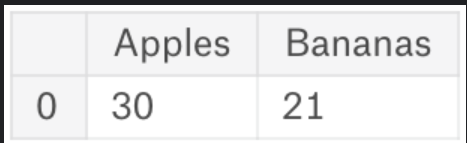

In [21]:
fruits = {
    'Apples': 30,
    'Bananas': 21
}

df_fruits = pd.DataFrame(fruits, index=[0])
df_fruits

,Apples,Bananas
0,30,21


2. Create a dataframe `fruit_sales` that matches the diagram below:

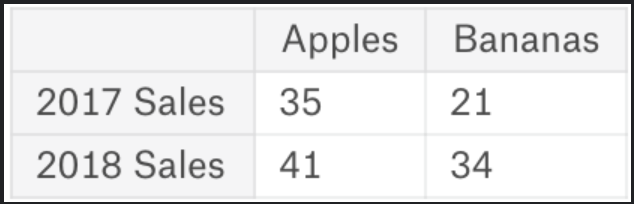

In [22]:
fruits = {
    'Apples': [35, 41],
    'Bananas': [21, 34]
}

period = ['2017 Sales', '2018 Sales']

fruit_sales = pd.DataFrame(fruits, index=period)
fruit_sales 

,Apples,Bananas
2017 Sales,35,21
2018 Sales,41,34


3. Create a variable `ingredients` with a Series that looks like:

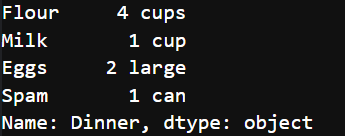

In [23]:
ingredients = ['Flour', 'Milk', 'Eggs', 'Spam']
quantity = ['4 cups', '1 cup', '2 large', '1 can']

pd.Series(quantity,index=ingredients)

Flour     4 cups
Milk       1 cup
Eggs     2 large
Spam       1 can
dtype: object

In [24]:
animals = pd.DataFrame({'Cows': [12, 20], 'Goats': [22, 19]}, index=['Year 1', 'Year 2'])
animals

,Cows,Goats
Year 1,12,22
Year 2,20,19
